## Visualise annotations on synthetic maps

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from matplotlib.patches import Polygon as MplPolygon
import matplotlib.image as mpimg

In [2]:
ROOT = "/home/STual/DAN-cadastre"
path = f"{ROOT}/dataset-cartes/test/"
csv_file = f"{ROOT}/dataset-cartes/annotations_plougastel.csv"
zoneid = "zone_0_1"

In [3]:
# Function to parse WKT points and convert them to a list of coordinates
def parse_wkt_point(wkt):
    wkt = wkt.replace('POINT(', '').replace(')', '')
    wkt = wkt.split(' ')
    coords = list(map(float, wkt))
    return coords

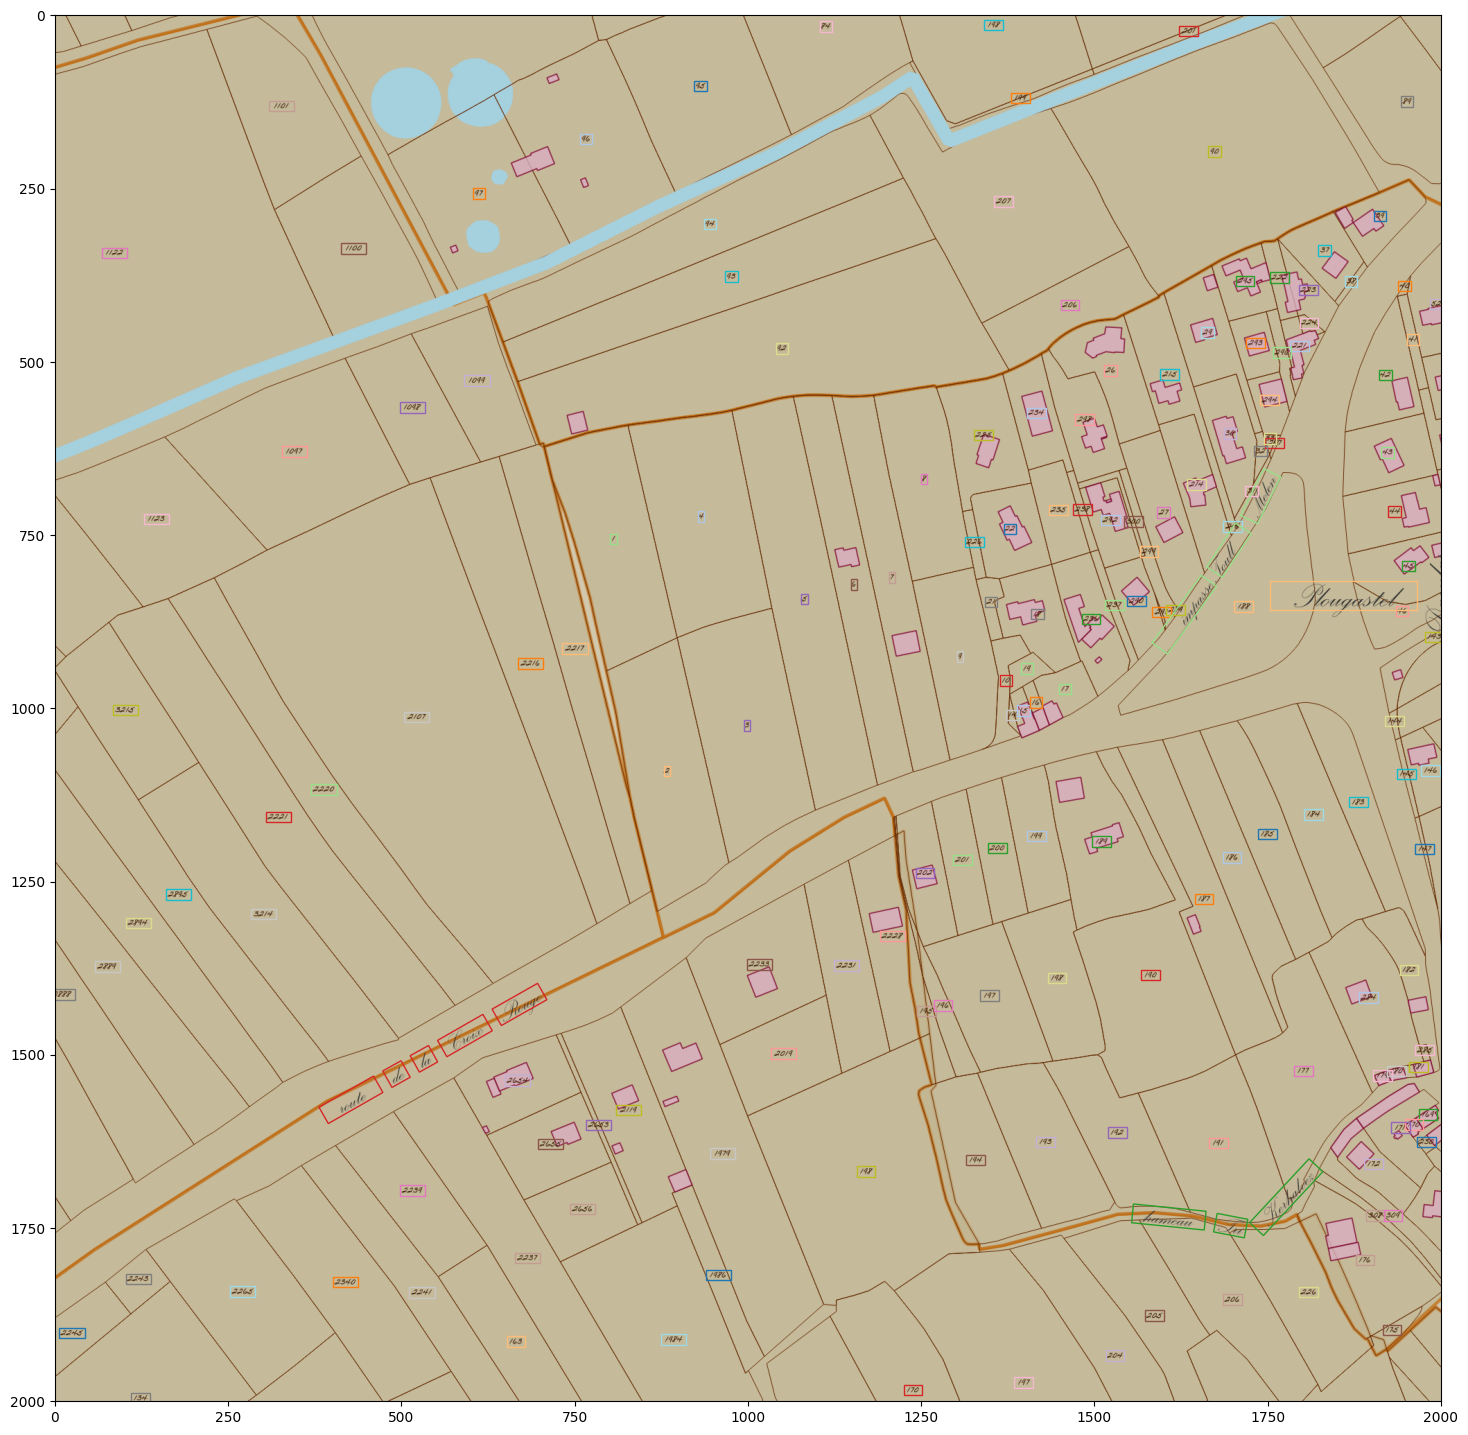

In [4]:
# Read the CSV file
df = pd.read_csv(csv_file)

# Image dimensions (adjust these to match your image)
image_path = path + 'extrait_' + zoneid +'.png'
img = mpimg.imread(image_path)
img_height, img_width, _ = img.shape

# Create a plot
fig, ax = plt.subplots()
ax.imshow(img)

# Dictionary to store colors for each 'cle_origine'
color_dict = {}

# Convert the DataFrame to polygons and plot them
for _, row in df.iterrows():
    if row['id_zone'] == zoneid:  # Filter by id_zone
        xmin_ymin = parse_wkt_point(row['x1_y1'])
        xmin_ymax = parse_wkt_point(row['x2_y2'])
        xmax_ymax = parse_wkt_point(row['x3_y3'])
        xmax_ymin = parse_wkt_point(row['x4_y4'])
        
        # Create the polygon coordinates
        coordinates = [xmin_ymin, xmin_ymax, xmax_ymax, xmax_ymin, xmin_ymin]
        
        # Create a polygon
        polygon = Polygon(coordinates)
        
        # Generate a color for each 'cle_origine' if not already in the dictionary
        if row['cle_origine'] not in color_dict:
            color_dict[row['cle_origine']] = plt.cm.tab20(len(color_dict) % 20)
        
        # Create a matplotlib polygon patch
        mpl_polygon = MplPolygon(list(polygon.exterior.coords), closed=True, 
                                 edgecolor=color_dict[row['cle_origine']], fill=False)
        
        # Add the patch to the plot
        ax.add_patch(mpl_polygon)

# Set plot limits to image dimensions
ax.set_xlim(0, img_width)
ax.set_ylim(img_height, 0)  # Flip the y-axis to match image coordinates

#increase fig resolution
fig.set_size_inches(18, 18)
plt.show()